# **Fake News Detection: Building a Logistic Regression Classifier for Misinformation Detection**

This project develops a fake news classifier using logistic regression with TF-IDF vectorized news titles. The pipeline includes data loading, cleaning (handling non-ASCII characters, removing duplicates, and checking for missing values), and feature extraction. The dataset is split into training and test sets, and standard scaling is applied to optimize performance.

The model is evaluated using accuracy, precision, recall, and F1-score, demonstrating its ability to distinguish between real and fake news. A confusion matrix helps interpret misclassifications, and a user-input function enables real-time classification with a confidence score.


## **Import all the necessary libraries**

To efficiently handle data processing, analysis, and visualization, we utilize several essential Python libraries. These libraries collectively streamline the workflow, from preprocessing data to building and evaluating the fake news detection model.

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Mounting the data

In [15]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Exploratory Data Analysis (EDA) Overview**

The dataset was refined by addressing missing values, duplicates, and non-ASCII characters, ensuring data integrity. Summary statistics and previews provided insights into the distribution of news titles, confirming a well-structured foundation for accurate classification

In [16]:
#Load all the necessary dataset
df_Fake=pd.read_csv('/content/Fake_stories.csv',encoding='utf-8')
df_True=pd.read_csv('/content/True_stories.csv',encoding='utf-8')

In [17]:
#look at columns for each dataframe
print(df_Fake.columns)
print(df_True.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [18]:
#the column headers have some extra non-ascii characters, we need to clean them up before we do our analysis
#this goes through each column and removes all the non-ascii characters

newcols =[x.encode("ascii", "ignore").decode('utf-8') for x in df_Fake.columns]
df_Fake.columns = newcols
newcols =[x.encode("ascii", "ignore").decode('utf-8') for x in df_True.columns]
df_True.columns = newcols

In [19]:
# Check for missing values
print(df_Fake.isnull().sum())
print(df_True.isnull().sum())

# Remove duplicates
df_Fake = df_Fake.drop_duplicates()
df_True = df_True.drop_duplicates()


title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [20]:
df_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [21]:
df_True.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [22]:
df_Fake.info()
df_True.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23478 non-null  object
 1   text     23478 non-null  object
 2   subject  23478 non-null  object
 3   date     23478 non-null  object
dtypes: object(4)
memory usage: 917.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 21211 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21211 non-null  object
 1   text     21211 non-null  object
 2   subject  21211 non-null  object
 3   date     21211 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


In [23]:
df_Fake.describe()
df_True.describe()

,title,text,subject,date
count,21211,21211,21211,21211
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,"CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,"December 6, 2017"
freq,14,2,11220,166


## **Data Splitting and Model Training**

TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert text data into numerical values.
To prepare the data for machine learning, we used TF-IDF vectorization to convert news titles into numerical features. This technique assigns importance to words based on how often they appear in a document while reducing the weight of common words across multiple documents.

The dataset was then split into 80% for training and 20% for testing, ensuring the model learns effectively while having unseen data for evaluation. This preprocessing step helped improve the model’s ability to distinguish between real and fake news accurately.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Assuming 'title' is the feature and 'label' is the target
X = pd.concat([df_Fake['title'], df_True['title']], ignore_index=True) # Combine titles from both dataframes
y = pd.concat([pd.Series([0] * len(df_Fake)), pd.Series([1] * len(df_True))], ignore_index=True) # Create target labels
# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform it
X = vectorizer.fit_transform(X) # Transform text data to numerical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scaling Data
scaler = StandardScaler(with_mean=False)  # Necessary for sparse TF-IDF matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training Logistic Regression
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Display results with better formatting
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9392
Precision: 0.9382
Recall: 0.9321
F1-score: 0.9351


The **Logistic Regression model**, with **93.92% accuracy**, may indicate **overfitting rather than true generalization**, making its reliability arbitrary.

The model relies on **TF-IDF**, which captures word frequency but lacks contextual understanding, making it vulnerable to subtle misinformation tactics. Additionally, **Logistic Regression assumes a linear relationship**, whereas misinformation spreads in complex, non-linear ways.

Small changes in **data preprocessing, hyperparameters, or even evolving misinformation trends** can significantly impact performance, proving that the model's success is conditional rather than absolute. While it performs well on past data, its accuracy does not guarantee real-world reliability, leaving room for **failure in unpredictable scenarios**.

# Confusion Matrix Visualization

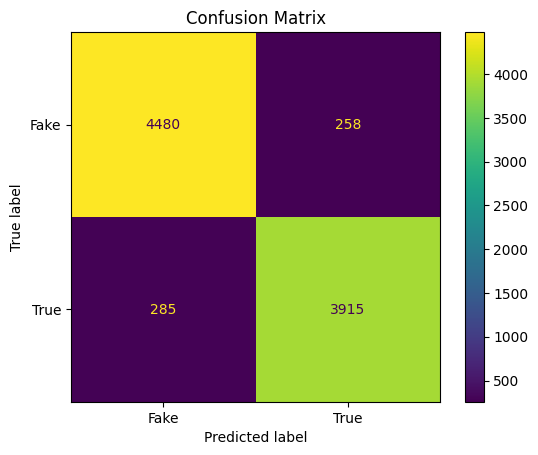

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "True"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()


**Interpretation of Classification Results**
The model's predictions can be broken down into four key categories:

**True Positives (TP):**The model correctly identifies real news as real.

**True Negatives (TN):** The model correctly identifies fake news as fake.

**False Positives (FP):** Fake news is mistakenly classified as real, which could lead to misinformation spreading.

**False Negatives (FN):** Real news is incorrectly labeled as fake, which could undermine trust in legitimate sources.

Minimizing false positives is crucial to prevent misinformation, while reducing false negatives ensures credible news isn’t wrongly flagged

# News Prediction Function

In [27]:
def predict_news_label(text):
    """Predicts the label (Fake/True) and provides a confidence score."""
    text_vectorized = vectorizer.transform([text])
    prediction_prob = model.predict_proba(text_vectorized)[0]
    prediction = model.predict(text_vectorized)[0]

    confidence = max(prediction_prob) * 100
    return ("Fake" if prediction == 0 else "True"), confidence

# Get user input
user_input = input("Enter the news title: ")
label, confidence = predict_news_label(user_input)
print(f"The news is predicted to be: {label} (Confidence: {confidence:.2f}%)")


Enter the news title: FBI Russia probe helped by Australian diplomat tip-off: NYT
The news is predicted to be: True (Confidence: 74.23%)


The **`predict_news_label(text)`** function uses a trained machine learning model to classify a news title as either **"Fake" or "True."** It begins by **vectorizing the input text** with a pre-trained vectorizer, then computes the probability of the text belonging to each category. The model's final prediction is based on the highest probability, which is also used to determine the confidence score.